In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../"))


# os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
from desc import set_device
set_device("gpu")

In [2]:
import numpy as np
np.set_printoptions(linewidth=np.inf, precision=4, suppress=True, threshold=sys.maxsize)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import functools
import scipy

In [3]:
import desc
from desc.plotting import *
from desc.backend import print_backend_info

print_backend_info()

DESC version=0.14.1+330.g94cfdd9f2.dirty.
Using JAX backend: jax version=0.6.0, jaxlib version=0.6.0, dtype=float64.
Using device: NVIDIA GeForce RTX 4080 Laptop GPU (id=0), with 11.17 GB available memory.


In [7]:
eq = desc.io.load("eq-poincare-landreman2021-island-L14M14N4.h5")
K = desc.io.load("surface-K-poincare-landreman2021-L14M14N4.h5")

/CODES/DESC/desc/io/hdf5_io.py:127: RuntimeWarning: 
The object attribute '_bdry_mode' was not loaded from the file.
This is likely because the file containing 'Equilibrium' was created before '_bdry_mode' became an attribute of objects of class '<class 'desc.equilibrium.equilibrium.Equilibrium'>'.
The user may verify that a default value has been set.
This warning will persist until the file is saved with the new object.

Note to developers: Add 'def _set_up(self)' as a method to class '<class 'desc.equilibrium.equilibrium.Equilibrium'>'
(or the superclass where this new attribute is assigned) that assigns a value to '_bdry_mode'.
This method is called automatically when a file is loaded.
Recall that the testing suite will fail on warnings.
  warnings.warn(


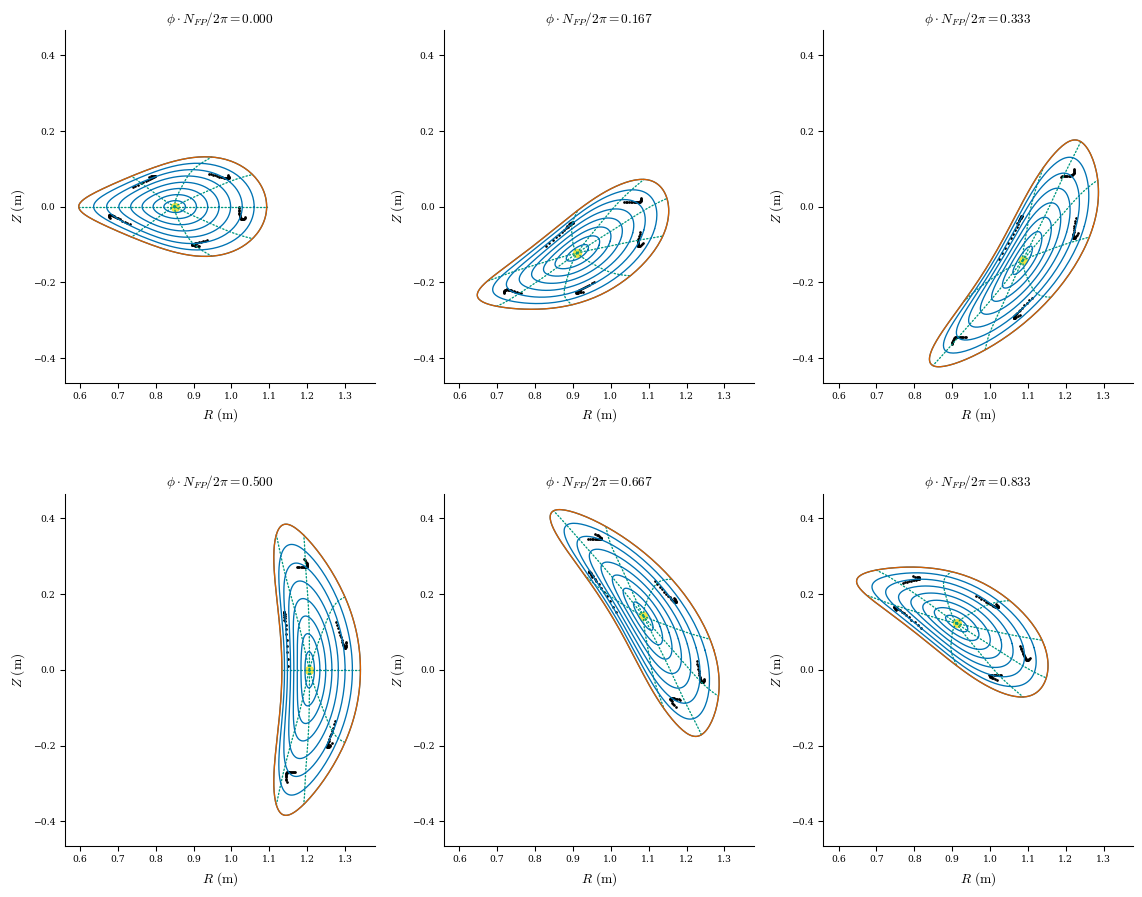

In [8]:
from desc.magnetic_fields import ScaledMagneticField
r0 = 1.02
z0 = 0
fig, ax = plot_surfaces(eq)
# K = ScaledMagneticField(-1, K)
poincare_plot(
    K,
    r0,
    z0,
    NFP=eq.NFP,
    ax=ax,
    color="k",
    size=1,
    ntransit=100,
);
# fig.savefig("poincare-landreman2021-island-plot.png", dpi=500)

In [ ]:
# you have to checkout to yge/field_plot branch to use this function
fig, data = plot_field_lines(K, r0, z0, nphi_per_transit=100, ntransit=200, return_data=True)
fig.write_html("field-lines-landreman2021-island.html")
fig

In [ ]:
X = data["X"][0]
Y = data["Y"][0]
Z = data["Z"][0]
np.savetxt("field_lines-landreman2021-island-X.txt", X)
np.savetxt("field_lines-landreman2021-island-Y.txt", Y)
np.savetxt("field_lines-landreman2021-island-Z.txt", Z)